In [1]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# ~.py

# Version: 2018.11.29.01

# Requiered libraries
import sys, os, math, time
import numpy as np
import scipy.linalg as cpy
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
@njit()
def g(x):
    return np.sin(math.pi*x)

@njit()
def explicit(X,T,u,alpha):
    for ii in range(0,T-1):
        for jj in prange(1,X):
            u[ii+1,jj] = alpha*u[ii,jj-1] + (1.-2.*alpha)*u[ii,jj] + alpha*u[ii,jj+1]
    return u
            


In [3]:
N = 100
dt = 5e-5
T = 4000

u = np.zeros((T,N+1), np.double)
(x,dx) = np.linspace(0,1,N+1, retstep=True)
alpha = dt/dx**2
u[0,:] = g(x)
u[0,0] = u[0,-1] = 0.
print("alpha =\n",alpha)
print("x =\n",x)
print("u[0] =\n",u[0,:])

alpha =
 0.5
x =
 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
u[0] =
 [0.         0.03141076 0.06279052 0.09410831 0.12533323 0.15643447
 0.18738131 0.21814324 0.24868989 0.27899111 0.30901699 0.33873792
 0.36812455 0.39714789 0.42577929 0.4539905  0.48175367 0.50904142
 0.53582679 0.56208338 0.58778525 0.61290705 0.63742399 0.66131187
 0.68454711 0.70710678 0.72896863 0.75011107 0.77051324 0.79015501
 0.80901699 0.82708057 0.84432793 0.86074203 0.87630668 0.89100652
 0.90482705 0.91775463 0.92977649 0.94088077 0.95105652 0.

In [4]:
t0 = time.time()
sol = explicit(N,T,u,alpha)
t1 = time.time()
print(t1-t0)
#print(sol[-1,:])

0.15976762771606445


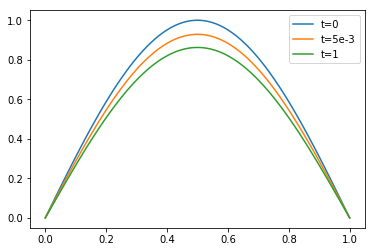

In [9]:
#%matplotlib qt
plt.plot(x,sol[0,:], '-', label = "t=0")
plt.plot(x,sol[150,:], '-', label = "t=5e-3")
plt.plot(x,sol[300,:], '-', label = "t=1")
plt.legend(loc='best')
plt.show()

In [6]:
#%matplotlib qt
#fig, ax = plt.subplots()
#im = ax.imshow(np.flip(sol,0), cmap='jet')
#cbar = fig.colorbar(im)